In [427]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import fashion_mnist
import keras.layers as layers
from keras.models import load_model
import keras.models as models
import numpy as np
from PIL import Image
import os
import matplotlib.pyplot as plt

In [325]:
np.random.seed(42)
tf.random.set_seed(42)

In [326]:
(X_train,y_train),(X_test,y_test) = fashion_mnist.load_data()

In [327]:
X_train = X_train.reshape(len(X_train),-1)
y_train = y_train.reshape(len(y_train),-1)

X_test = X_test.reshape(len(X_test),-1)
y_test = y_test.reshape(len(y_test),-1)

In [328]:
X_train = X_train.astype(float)/255
X_test = X_test.astype(float)/255

In [329]:
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [330]:
class DNN(tf.keras.Model):
    def __init__(self):
        super().__init__()

        self.fc_layer1 = models.Sequential([
        layers.Dense(1024),
        layers.BatchNormalization(),
        layers.ReLU(),
        layers.Dropout(0.3)
        ])

        self.fc_layer2 = models.Sequential([
        layers.Dense(256),
        layers.BatchNormalization(),
        layers.ReLU(),
        layers.Dropout(0.3)
        ])

        self.output_layer = models.Sequential([
        layers.Dense(10),
        layers.Softmax()
        ])

    def call(self,x):
        x = self.fc_layer1(x)
        x = self.fc_layer2(x)
        x = self.output_layer(x)
        return x

In [331]:
model = DNN()
model.build(input_shape=(128, 784))

In [332]:
model.summary()

Model: "dnn_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_61 (Sequential)  (128, 1024)               807936    
                                                                 
 sequential_62 (Sequential)  (128, 256)                263424    
                                                                 
 sequential_63 (Sequential)  (128, 10)                 2570      
                                                                 
Total params: 1,073,930
Trainable params: 1,071,370
Non-trainable params: 2,560
_________________________________________________________________


In [333]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)

In [334]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [335]:
from keras.callbacks import ModelCheckpoint,EarlyStopping,LearningRateScheduler

In [336]:
import datetime as dt

time = dt.datetime.now().ctime()
time.replace(' ','_')
file_path = f'{time}.ckp'
file_path=file_path.replace(' ','_')
file_path = './saved_model'

In [337]:
stop_callback = EarlyStopping(monitor='val_accuracy',patience=3)

In [338]:
model_callbacks = ModelCheckpoint(filepath=file_path,
                                  monitor='val_accuracy',
                                  save_best_only=True,
                                  mode='max')

In [339]:
def scheduler(epoch, lr):
  if epoch < 10:
    return lr
  else:
    return lr * tf.math.exp(-0.1)

lr_callbacks = LearningRateScheduler(scheduler)

In [340]:
model.fit(x=X_train,y=y_train,
          batch_size=128,
          epochs=30,
          validation_data=(X_test,y_test),
          callbacks=[stop_callback,model_callbacks,lr_callbacks])

Epoch 1/30
466/469 [============================>.] - ETA: 0s - loss: 0.6527 - accuracy: 0.7754

INFO:tensorflow:Assets written to: .\saved_model\assets


INFO:tensorflow:Assets written to: .\saved_model\assets


469/469 [==============================] - 8s 16ms/step - loss: 0.6519 - accuracy: 0.7757 - val_loss: 0.4419 - val_accuracy: 0.8451 - lr: 1.0000e-04
Epoch 2/30
469/469 [==============================] - ETA: 0s - loss: 0.4369 - accuracy: 0.8450

INFO:tensorflow:Assets written to: .\saved_model\assets


INFO:tensorflow:Assets written to: .\saved_model\assets


469/469 [==============================] - 8s 17ms/step - loss: 0.4369 - accuracy: 0.8450 - val_loss: 0.3938 - val_accuracy: 0.8581 - lr: 1.0000e-04
Epoch 3/30
466/469 [============================>.] - ETA: 0s - loss: 0.3867 - accuracy: 0.8632

INFO:tensorflow:Assets written to: .\saved_model\assets


INFO:tensorflow:Assets written to: .\saved_model\assets


469/469 [==============================] - 9s 19ms/step - loss: 0.3868 - accuracy: 0.8631 - val_loss: 0.3823 - val_accuracy: 0.8594 - lr: 1.0000e-04
Epoch 4/30
467/469 [============================>.] - ETA: 0s - loss: 0.3579 - accuracy: 0.8720

INFO:tensorflow:Assets written to: .\saved_model\assets


INFO:tensorflow:Assets written to: .\saved_model\assets


469/469 [==============================] - 9s 19ms/step - loss: 0.3579 - accuracy: 0.8720 - val_loss: 0.3537 - val_accuracy: 0.8702 - lr: 1.0000e-04
Epoch 5/30
468/469 [============================>.] - ETA: 0s - loss: 0.3398 - accuracy: 0.8763

INFO:tensorflow:Assets written to: .\saved_model\assets


INFO:tensorflow:Assets written to: .\saved_model\assets


469/469 [==============================] - 9s 18ms/step - loss: 0.3398 - accuracy: 0.8763 - val_loss: 0.3449 - val_accuracy: 0.8748 - lr: 1.0000e-04
Epoch 6/30
467/469 [============================>.] - ETA: 0s - loss: 0.3180 - accuracy: 0.8845

INFO:tensorflow:Assets written to: .\saved_model\assets


INFO:tensorflow:Assets written to: .\saved_model\assets


469/469 [==============================] - 9s 19ms/step - loss: 0.3179 - accuracy: 0.8846 - val_loss: 0.3282 - val_accuracy: 0.8811 - lr: 1.0000e-04
Epoch 7/30
469/469 [==============================] - 7s 16ms/step - loss: 0.3050 - accuracy: 0.8895 - val_loss: 0.3436 - val_accuracy: 0.8756 - lr: 1.0000e-04
Epoch 8/30
468/469 [============================>.] - ETA: 0s - loss: 0.2932 - accuracy: 0.8935

INFO:tensorflow:Assets written to: .\saved_model\assets


INFO:tensorflow:Assets written to: .\saved_model\assets


469/469 [==============================] - 11s 23ms/step - loss: 0.2930 - accuracy: 0.8936 - val_loss: 0.3161 - val_accuracy: 0.8826 - lr: 1.0000e-04
Epoch 9/30
467/469 [============================>.] - ETA: 0s - loss: 0.2805 - accuracy: 0.8979

INFO:tensorflow:Assets written to: .\saved_model\assets


INFO:tensorflow:Assets written to: .\saved_model\assets


469/469 [==============================] - 13s 28ms/step - loss: 0.2803 - accuracy: 0.8979 - val_loss: 0.3187 - val_accuracy: 0.8831 - lr: 1.0000e-04
Epoch 10/30
468/469 [============================>.] - ETA: 0s - loss: 0.2695 - accuracy: 0.9008

INFO:tensorflow:Assets written to: .\saved_model\assets


INFO:tensorflow:Assets written to: .\saved_model\assets


469/469 [==============================] - 12s 25ms/step - loss: 0.2696 - accuracy: 0.9007 - val_loss: 0.3141 - val_accuracy: 0.8840 - lr: 1.0000e-04
Epoch 11/30
467/469 [============================>.] - ETA: 0s - loss: 0.2599 - accuracy: 0.9055

INFO:tensorflow:Assets written to: .\saved_model\assets


INFO:tensorflow:Assets written to: .\saved_model\assets


469/469 [==============================] - 13s 28ms/step - loss: 0.2600 - accuracy: 0.9055 - val_loss: 0.3056 - val_accuracy: 0.8895 - lr: 9.0484e-05
Epoch 12/30
469/469 [==============================] - 13s 27ms/step - loss: 0.2485 - accuracy: 0.9096 - val_loss: 0.3075 - val_accuracy: 0.8891 - lr: 8.1873e-05
Epoch 13/30
468/469 [============================>.] - ETA: 0s - loss: 0.2385 - accuracy: 0.9133

INFO:tensorflow:Assets written to: .\saved_model\assets


INFO:tensorflow:Assets written to: .\saved_model\assets


469/469 [==============================] - 14s 31ms/step - loss: 0.2385 - accuracy: 0.9134 - val_loss: 0.2963 - val_accuracy: 0.8936 - lr: 7.4082e-05
Epoch 14/30
469/469 [==============================] - 12s 25ms/step - loss: 0.2318 - accuracy: 0.9160 - val_loss: 0.2991 - val_accuracy: 0.8914 - lr: 6.7032e-05
Epoch 15/30
469/469 [==============================] - 10s 21ms/step - loss: 0.2222 - accuracy: 0.9187 - val_loss: 0.3045 - val_accuracy: 0.8898 - lr: 6.0653e-05
Epoch 16/30
467/469 [============================>.] - ETA: 0s - loss: 0.2163 - accuracy: 0.9207

INFO:tensorflow:Assets written to: .\saved_model\assets


INFO:tensorflow:Assets written to: .\saved_model\assets


469/469 [==============================] - 10s 22ms/step - loss: 0.2162 - accuracy: 0.9207 - val_loss: 0.2900 - val_accuracy: 0.8957 - lr: 5.4881e-05
Epoch 17/30
469/469 [==============================] - ETA: 0s - loss: 0.2115 - accuracy: 0.9221

INFO:tensorflow:Assets written to: .\saved_model\assets


INFO:tensorflow:Assets written to: .\saved_model\assets


469/469 [==============================] - 12s 25ms/step - loss: 0.2115 - accuracy: 0.9221 - val_loss: 0.2886 - val_accuracy: 0.8958 - lr: 4.9659e-05
Epoch 18/30
469/469 [==============================] - 7s 16ms/step - loss: 0.2036 - accuracy: 0.9254 - val_loss: 0.2949 - val_accuracy: 0.8942 - lr: 4.4933e-05
Epoch 19/30
469/469 [==============================] - 8s 18ms/step - loss: 0.2020 - accuracy: 0.9260 - val_loss: 0.2924 - val_accuracy: 0.8923 - lr: 4.0657e-05
Epoch 20/30
469/469 [==============================] - ETA: 0s - loss: 0.1958 - accuracy: 0.9281

INFO:tensorflow:Assets written to: .\saved_model\assets


INFO:tensorflow:Assets written to: .\saved_model\assets


469/469 [==============================] - 10s 21ms/step - loss: 0.1958 - accuracy: 0.9281 - val_loss: 0.2860 - val_accuracy: 0.8971 - lr: 3.6788e-05
Epoch 21/30
469/469 [==============================] - 8s 18ms/step - loss: 0.1918 - accuracy: 0.9302 - val_loss: 0.2868 - val_accuracy: 0.8948 - lr: 3.3287e-05
Epoch 22/30
466/469 [============================>.] - ETA: 0s - loss: 0.1860 - accuracy: 0.9323

INFO:tensorflow:Assets written to: .\saved_model\assets


INFO:tensorflow:Assets written to: .\saved_model\assets


469/469 [==============================] - 10s 22ms/step - loss: 0.1862 - accuracy: 0.9322 - val_loss: 0.2900 - val_accuracy: 0.8979 - lr: 3.0119e-05
Epoch 23/30
467/469 [============================>.] - ETA: 0s - loss: 0.1830 - accuracy: 0.9340

INFO:tensorflow:Assets written to: .\saved_model\assets


INFO:tensorflow:Assets written to: .\saved_model\assets


469/469 [==============================] - 10s 22ms/step - loss: 0.1828 - accuracy: 0.9341 - val_loss: 0.2860 - val_accuracy: 0.8987 - lr: 2.7253e-05
Epoch 24/30
468/469 [============================>.] - ETA: 0s - loss: 0.1822 - accuracy: 0.9336

INFO:tensorflow:Assets written to: .\saved_model\assets


INFO:tensorflow:Assets written to: .\saved_model\assets


469/469 [==============================] - 11s 23ms/step - loss: 0.1822 - accuracy: 0.9336 - val_loss: 0.2892 - val_accuracy: 0.8990 - lr: 2.4660e-05
Epoch 25/30
469/469 [==============================] - 10s 21ms/step - loss: 0.1776 - accuracy: 0.9351 - val_loss: 0.2867 - val_accuracy: 0.8987 - lr: 2.2313e-05
Epoch 26/30
469/469 [==============================] - ETA: 0s - loss: 0.1737 - accuracy: 0.9375

INFO:tensorflow:Assets written to: .\saved_model\assets


INFO:tensorflow:Assets written to: .\saved_model\assets


469/469 [==============================] - 12s 26ms/step - loss: 0.1737 - accuracy: 0.9375 - val_loss: 0.2830 - val_accuracy: 0.8996 - lr: 2.0190e-05
Epoch 27/30
468/469 [============================>.] - ETA: 0s - loss: 0.1734 - accuracy: 0.9374

INFO:tensorflow:Assets written to: .\saved_model\assets


INFO:tensorflow:Assets written to: .\saved_model\assets


469/469 [==============================] - 14s 30ms/step - loss: 0.1734 - accuracy: 0.9374 - val_loss: 0.2855 - val_accuracy: 0.8999 - lr: 1.8268e-05
Epoch 28/30
469/469 [==============================] - ETA: 0s - loss: 0.1720 - accuracy: 0.9374

INFO:tensorflow:Assets written to: .\saved_model\assets


INFO:tensorflow:Assets written to: .\saved_model\assets


469/469 [==============================] - 15s 32ms/step - loss: 0.1720 - accuracy: 0.9374 - val_loss: 0.2845 - val_accuracy: 0.9005 - lr: 1.6530e-05
Epoch 29/30
469/469 [==============================] - 13s 28ms/step - loss: 0.1692 - accuracy: 0.9389 - val_loss: 0.2843 - val_accuracy: 0.8998 - lr: 1.4957e-05
Epoch 30/30
469/469 [==============================] - 12s 25ms/step - loss: 0.1691 - accuracy: 0.9382 - val_loss: 0.2835 - val_accuracy: 0.8998 - lr: 1.3534e-05


In [418]:
sample_folder_path = r'.\sample'
file_list = os.listdir(sample_folder_path)

In [419]:
img_dict = dict()
for file in file_list:
    file_path = os.path.join(sample_folder_path,file)
    img = Image.open(file_path)
    img = img.resize((28,28))
    img = img.convert("L")
    img_array = np.array(img)
    img_array = np.invert(img_array)
    img.close()
    img_array = img_array.astype(float)/255
    flattened_arr = img_array.flatten()
    file = file[:-4]
    img_dict[file] = flattened_arr

1/1 [==============================] - 0s 14ms/step


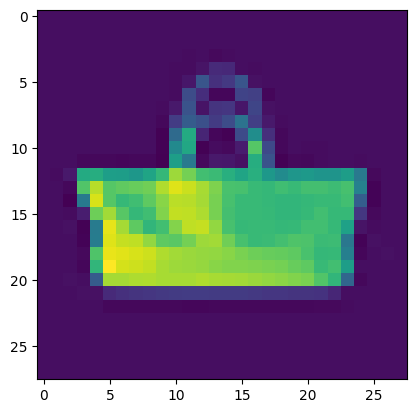

bag 8
1/1 [==============================] - 0s 15ms/step


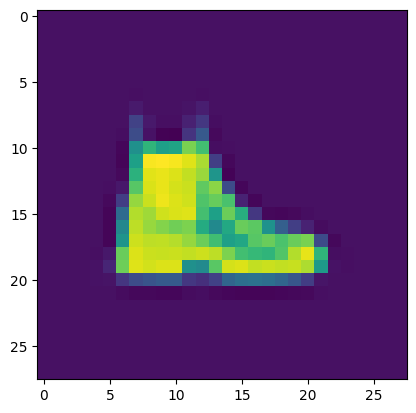

boots 8
1/1 [==============================] - 0s 15ms/step


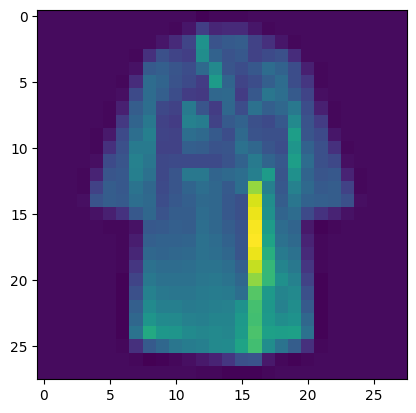

coat 0
1/1 [==============================] - 0s 16ms/step


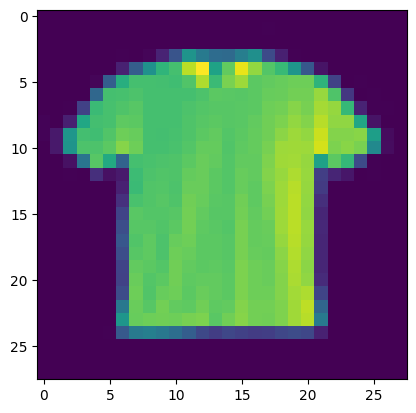

tshirt 0


In [447]:
for key in list(img_dict.keys()):
    input_value = img_dict[key].reshape(-1,784)
    pred= model.predict(input_value)
    img=input_value.reshape(28,-1)
    plt.imshow(img)
    plt.show()
    print(key,pred.argmax())